In [1]:
from datetime import datetime 
import pandas as pd
from utils import simulator_period,save_sim_resuls,sim_and_save
from subjects.corr_coef import CorrCoeff,TrendFunc

###  Обозначаем период

In [4]:
start_date = datetime.strptime("01/1/2022", "%d/%m/%Y")
end_date = datetime.strptime("01/1/2025", "%d/%m/%Y")


####  Запускаем симуляцию.

In [5]:
sim_and_save(start_date,end_date,trend_func = TrendFunc.make_trend_dict_line,casino_fig_file_name_csv = 'casino_fig.csv', plr_pool_file_name = "plr_pool")

####  Загружаем в Дата Фрейм

In [6]:
prl_pool_df=pd.read_csv('plr_pool.csv', parse_dates = ['last_visit'])
casino_fig=pd.read_csv('casino_fig.csv', parse_dates = ['Date'])


####  Статистика по игрокам

In [7]:
prl_pool_df.head()

,id,visits,last_visit,res_sum,res_std,res_mean,hands_sum,hands_std,hands_mean,bets_sum,bets_std,bets_mean
0,769,174,2024-12-31,-6470.134590,464.248533,-37.184682,17425.0,14.782602,100.143678,606289.616300,514.349402,3484.423082
1,262,70,2024-12-09,-5561.943650,345.434258,-79.456338,6975.0,15.049476,99.642857,236047.657075,509.303742,3372.109387
2,263,152,2024-12-30,-3240.942777,104.685043,-21.321992,10442.0,10.449150,68.697368,102349.870803,102.419951,673.354413
3,519,150,2025-01-01,-15100.302072,256.663905,-100.668680,58606.0,36.326399,390.706667,609627.921985,377.872357,4064.186147
4,265,124,2024-12-25,-12717.877021,231.220838,-102.563524,48226.0,38.203529,388.919355,493354.290327,390.823932,3978.663632


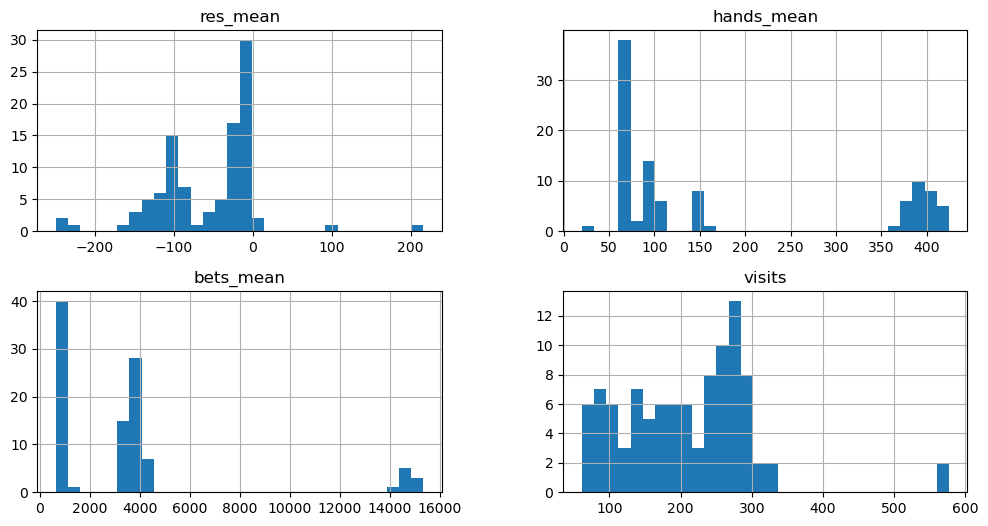

In [8]:
prl_pool_df[['res_mean','hands_mean','bets_mean', 'visits']].hist(figsize=(12,6), bins=30);

####  Общая статистика по заведению

In [9]:
casino_fig.head()

,Date,Heads,Day_Result,Total_Bets,Total_Hands
0,2022-01-01,25,187.148310,79439.490943,3972
1,2022-01-02,21,651.090018,46402.445157,2581
2,2022-01-03,10,2469.903372,33963.973956,2096
3,2022-01-04,10,-146.716214,13660.124678,1361
4,2022-01-05,14,-822.788468,59365.320499,2295


<Axes: xlabel='Date'>

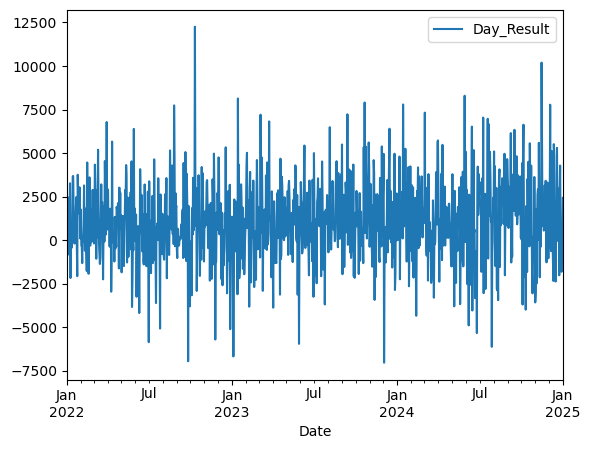

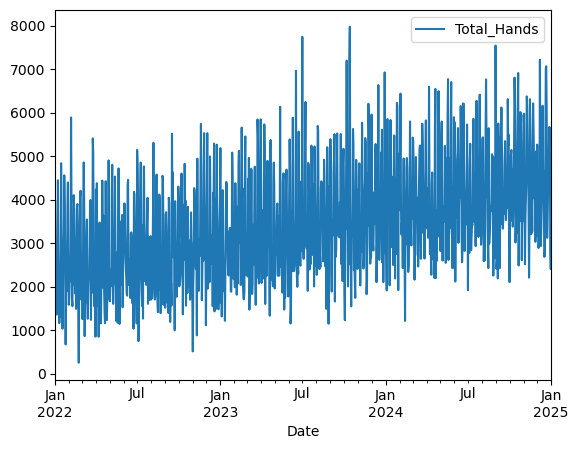

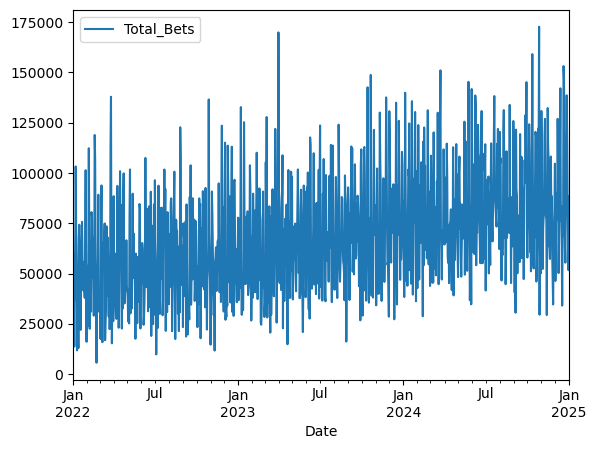

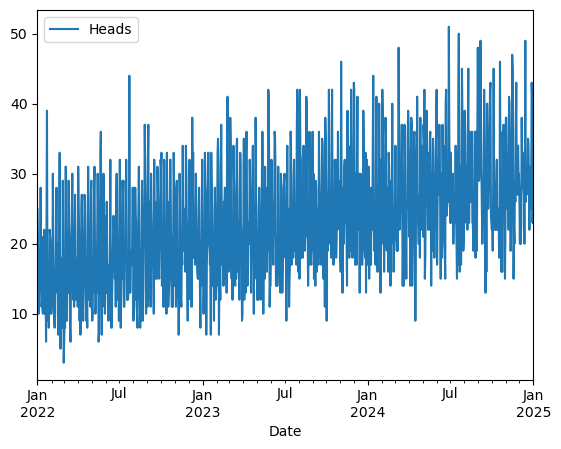

In [10]:
casino_fig[:].plot(x="Date", y ="Day_Result")
casino_fig[:].plot(x="Date", y ="Total_Hands")
casino_fig[:].plot(x="Date", y ="Total_Bets")
casino_fig[:].plot(x="Date", y ="Heads")
